# *DIGIT RECOGNISER*


We come across handwritten digits in almost every walk of life - postal mails, data entered on forms, 
bank cheques etc. Most of these have to be dealt with, through scanning the documents on which these digits
are written. It’s important for the digits to not be read incorrectly. Otherwise, mails could be delivered to wrong addresses, incorrect bank account numbers or incorrect amounts read from the cheques could lead to check bounces or incorrect transactions. 
The problem at hand is to use machine learning algorithms & neural networks to train the data in such a way that one of them efficiently recognizes handwritten digits with as much maximum accuracy as possible on the validation data. 


In [1]:
#Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split, ShuffleSplit
import tensorflow as tf
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import random
seed_value= 123
random.seed(seed_value)
np.random.seed(seed_value)

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing data from Kaggle
pip install kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/


In [6]:
! chmod 600 ~/.kaggle/kaggle.json


In [7]:
#Download digit rceognizer data from Kaggle Competition
! kaggle competitions download digit-recognizer


  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 208MB/s]


In [8]:
! unzip digit-recognizer

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
#Read test and train data sets
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Shape of Train dataset
train.shape

(42000, 785)

The data consists of 785 columns - 1 Label and 784 pixel columns. Every row has a 28x28 image which is shown in tabular format in a row with 784 columns which consist of values from 0-255 indicating lightness/darkness of the respective pixel. Label column shows the digit drawn by the user.


In [11]:
#Looking at the test dataset
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.shape

(28000, 784)

Test data has 784 pixel columns, without label column which is to be predicted

In [13]:
#Label column
labels = train["label"]
df_train = train.drop("label", axis=1)

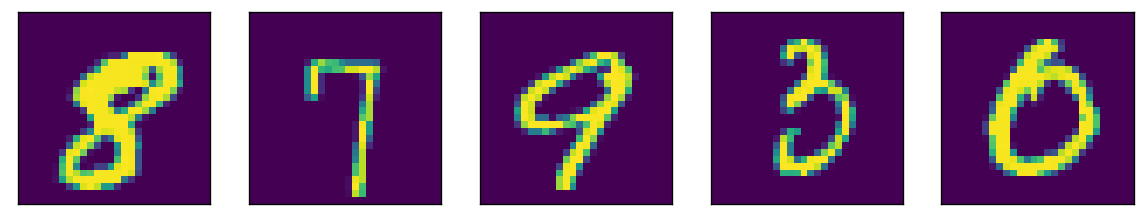

In [14]:
#Looking at the images 
def print_image(r, df):
    values = df.iloc[r].values
    images = values.reshape(28, 28)
    return images

fig, ax = plt.subplots(1, 5, figsize=(12, 9), dpi=120)
plt.setp(ax, xticks=[], yticks=[])

n=0
for i in [10,50,100,150,200]:
    ax[n].imshow(print_image(i, df_train))
    n+=1

### Train and Validation split

In [15]:
# splitting train dataset into train and validation sets
split = ShuffleSplit(n_splits=1, test_size=0.20, random_state=0)

index_train, index_val = next(iter(split.split(df_train, labels)))

X_train, X_test = df_train.iloc[index_train], df_train.iloc[index_val]
y_train, y_test = labels.iloc[index_train], labels.iloc[index_val]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [16]:
# defining target names
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']

### Modeling

### 1. Logistic Regression

The goal of a multiple logistic regression is to find an equation that best predicts the probability of a value of the Y variable as a function of the X variables. The independent variables then can be measured on a new value and the probability of that variable having a particular value of the dependent variable can be estimated.


In [17]:
# training and model validation
model1 = LogisticRegression()
model1.fit(X_train, y_train)

lr_train_score = model1.score(X_train, y_train)
lr_val_score = model1.score(X_test, y_test)

# predicting labels validation dataset
lr_y_pred = model1.predict(X_test)

# accuaracy
lr_accuracy = accuracy_score(y_test, lr_y_pred)

# precision
lr_precision = precision_score(y_test, lr_y_pred, average='macro')

# recall
lr_recall = recall_score(y_test, lr_y_pred, average='macro')

# confusion matrix
lr_confusionmat = confusion_matrix(y_test, lr_y_pred)

print("\nLogistic Regression model score on train set: ", lr_train_score)
print("\nLogistic Regression model score on validation set: ", lr_val_score)
print("\nLogistic Regression Accuracy on validation set: ", lr_accuracy)
print("\nPrecision score: ", lr_precision)
print("\nRecall score: ", lr_recall)
print("\nConfusion Matrix: \n", lr_confusionmat)


Logistic Regression model score on train set:  0.9390773809523809

Logistic Regression model score on validation set:  0.9175

Logistic Regression Accuracy on validation set:  0.9175

Precision score:  0.915731825026597

Recall score:  0.915498133753365

Confusion Matrix: 
 [[775   0   4   2   1   4  20   2   4   1]
 [  0 942   3   3   1   2   2   0   7   1]
 [  9  12 767  14   8   4   9  11  22   4]
 [  0   2  22 772   0  33   2   7  16   9]
 [  3   7   5   0 763   3   8   4   4  30]
 [ 10   3   5  26   6 643  13   6  36   8]
 [  4   0  12   0   7   8 807   0   3   0]
 [  2   4   9   1   7   3   0 848   3  22]
 [  3   9   5  24   9  27   8   1 670  12]
 [ 11   3   2   9  18   7   0  31  11 720]]


In [18]:
print("Logistic Regression Classification Report: \n")
print(classification_report(y_test, lr_y_pred, target_names=target_names))

Logistic Regression Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       813
           1       0.96      0.98      0.97       961
           2       0.92      0.89      0.91       860
           3       0.91      0.89      0.90       863
           4       0.93      0.92      0.93       827
           5       0.88      0.85      0.86       756
           6       0.93      0.96      0.94       841
           7       0.93      0.94      0.94       899
           8       0.86      0.87      0.87       768
           9       0.89      0.89      0.89       812

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



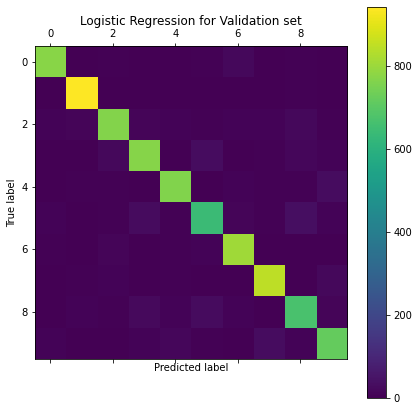

In [19]:
# plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (7,7)
plt.matshow(lr_confusionmat)
plt.title('Logistic Regression for Validation set')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('lr_confmat.png')
plt.show()

### 2. Stochastic Gradient Descent

Stochastic gradient descent is an optimization algorithm and it is used very often in machine learning applications to find the model parameters that correspond to the best fit between actual and predicted outputs. It's a naive approach but a very powerful technique.



In [20]:
# training and model validation
model2 = SGDClassifier()
model2.fit(X_train, y_train)

sgd_train_score = model2.score(X_train, y_train)
sgd_val_score = model2.score(X_test, y_test)

# predicting labels validation dataset
sgd_y_pred = model2.predict(X_test)

# accuaracy
sgd_accuracy = accuracy_score(y_test, sgd_y_pred)

# precision
sgd_precision = precision_score(y_test, sgd_y_pred, average='macro')

# recall
sgd_recall = recall_score(y_test, sgd_y_pred, average='macro')

# confusion matrix
sgd_confusionmat = confusion_matrix(y_test, sgd_y_pred)

print("\nStochastic Gradient Descent model score on train set: ", sgd_train_score)
print("\nStochastic Gradient Descent model score on validation set: ", sgd_val_score)
print("\nStochastic Gradient Descent Accuracy on validation set: ", sgd_accuracy)
print("\nPrecision score: ", sgd_precision)
print("\nRecall score: ", sgd_recall)
print("\nConfusion Matrix: \n", sgd_confusionmat)


Stochastic Gradient Descent model score on train set:  0.8892261904761904

Stochastic Gradient Descent model score on validation set:  0.8710714285714286

Stochastic Gradient Descent Accuracy on validation set:  0.8710714285714286

Precision score:  0.8764979156136755

Recall score:  0.8674090498620426

Confusion Matrix: 
 [[791   0   0   4   1   5   5   1   2   4]
 [  1 925   5   8   3   9   2   4   1   3]
 [  9   6 714  38  15  13  11  30  22   2]
 [  4   2  13 750   2  53   3  20   6  10]
 [  9   9   6   3 715   5   4  24   5  47]
 [ 14   2   3  19   5 683   5   8   9   8]
 [ 12   0   6   1   7  27 785   0   3   0]
 [  3   5   6   2   8   2   2 859   1  11]
 [  8   7   2  63   9 151  10  13 480  25]
 [ 10   1   2  18  21  23   0 118   4 615]]


In [21]:
print("Stochastic Gradient Descent Classification Report: \n")
print(classification_report(y_test, sgd_y_pred, target_names=target_names))

Stochastic Gradient Descent Classification Report: 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       813
           1       0.97      0.96      0.96       961
           2       0.94      0.83      0.88       860
           3       0.83      0.87      0.85       863
           4       0.91      0.86      0.89       827
           5       0.70      0.90      0.79       756
           6       0.95      0.93      0.94       841
           7       0.80      0.96      0.87       899
           8       0.90      0.62      0.74       768
           9       0.85      0.76      0.80       812

    accuracy                           0.87      8400
   macro avg       0.88      0.87      0.87      8400
weighted avg       0.88      0.87      0.87      8400



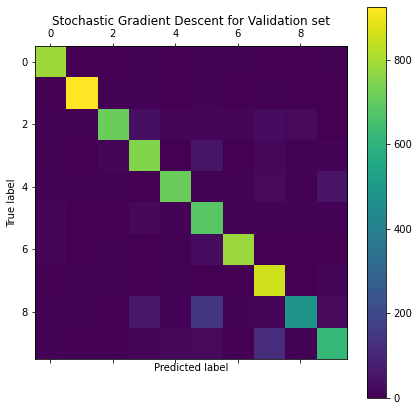

In [22]:
# plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (7,7)
plt.matshow(sgd_confusionmat)
plt.title('Stochastic Gradient Descent for Validation set')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('sgd_confmat.png')
plt.show()

### 3. Support Vector Machine

Support vector machines are supervised machine learning algorithms. They are suitable for both regression and classification tasks. One or more hyperplanes are constructed in n-dimensional space and the hyperplane having the largest distance to the nearest training points of any class is considered as the best separation for the classifier.


In [23]:
# training and model validation
model3 = SVC()
model3.fit(X_train, y_train)

svc_train_score = model3.score(X_train, y_train)
svc_val_score = model3.score(X_test, y_test)

# predicting labels validation dataset
svc_y_pred = model3.predict(X_test)

# accuaracy
svc_accuracy = accuracy_score(y_test, svc_y_pred)

# precision
svc_precision = precision_score(y_test, svc_y_pred, average='macro')

# recall
svc_recall = recall_score(y_test, svc_y_pred, average='macro')

# confusion matrix
svc_confusionmat = confusion_matrix(y_test, svc_y_pred)

print("\nSupport Vector Machine model score on train set: ", svc_train_score)
print("\nSupport Vector Machine model score on validation set: ", svc_val_score)
print("\nSupport Vector Machine Accuracy on validation set: ", svc_accuracy)
print("\nPrecision score: ", svc_precision)
print("\nRecall score: ", svc_recall)
print("\nConfusion Matrix: \n", svc_confusionmat)


Support Vector Machine model score on train set:  0.9892559523809524

Support Vector Machine model score on validation set:  0.9747619047619047

Support Vector Machine Accuracy on validation set:  0.9747619047619047

Precision score:  0.9743998324619803

Recall score:  0.9746146061460561

Confusion Matrix: 
 [[801   0   1   0   1   3   3   0   4   0]
 [  0 953   3   2   0   0   0   1   2   0]
 [  2   1 843   2   1   0   0   5   6   0]
 [  1   1  11 821   0  12   2   4   9   2]
 [  1   3   2   0 800   1   4   2   0  14]
 [  2   0   0   4   0 743   6   0   1   0]
 [  2   0   0   0   2   5 831   0   1   0]
 [  0   2   6   1   6   2   0 873   3   6]
 [  2   3   0   3   3   5   4   0 747   1]
 [  5   2   2   4   9   1   0  11   2 776]]


In [24]:
print("Support Vector Machine Classification Report: \n")
print(classification_report(y_test, svc_y_pred, target_names=target_names))

Support Vector Machine Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       813
           1       0.99      0.99      0.99       961
           2       0.97      0.98      0.98       860
           3       0.98      0.95      0.97       863
           4       0.97      0.97      0.97       827
           5       0.96      0.98      0.97       756
           6       0.98      0.99      0.98       841
           7       0.97      0.97      0.97       899
           8       0.96      0.97      0.97       768
           9       0.97      0.96      0.96       812

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



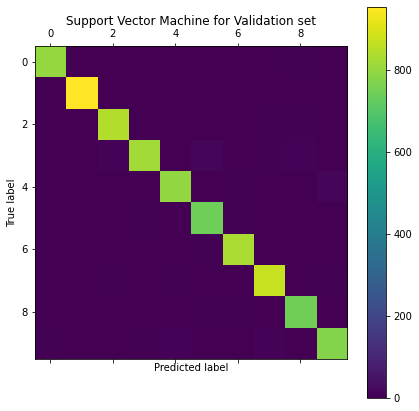

In [25]:
# plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (7,7)
plt.matshow(svc_confusionmat)
plt.title('Support Vector Machine for Validation set')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('svc_confmat.png')
plt.show()

### 4. Decision Tree

A decision tree is a supervised machine learning technique. Decision trees make predictions based on how a previous set of questions were answered in respective with the data.

In [26]:
# training and model validation
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)

dt_train_score = model4.score(X_train, y_train)
dt_val_score = model4.score(X_test, y_test)

# predicting labels validation dataset
dt_y_pred = model4.predict(X_test)

# accuaracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# precision
dt_precision = precision_score(y_test, dt_y_pred, average='macro')

# recall
dt_recall = recall_score(y_test, dt_y_pred, average='macro')

# confusion matrix
dt_confusionmat = confusion_matrix(y_test, dt_y_pred)

print("\nDecision Tree model score on train set: ", dt_train_score)
print("\nDecision Tree model score on validation set: ", dt_val_score)
print("\nDecision Tree Accuracy on validation set: ", dt_accuracy)
print("\nPrecision score: ", dt_precision)
print("\nRecall score: ", dt_recall)
print("\nConfusion Matrix: \n", dt_confusionmat)


Decision Tree model score on train set:  1.0

Decision Tree model score on validation set:  0.8529761904761904

Decision Tree Accuracy on validation set:  0.8529761904761904

Precision score:  0.8506564995138002

Recall score:  0.850346067776368

Confusion Matrix: 
 [[739   1   4   9   2  19  16   4   8  11]
 [  2 917   7   5   5   6   4   2  10   3]
 [ 12  11 700  32  13  16  13  19  30  14]
 [ 10   8  31 695   4  47   6  20  23  19]
 [  4   8   8  10 698   9  16  11  20  43]
 [  5   2  11  50  10 606  19   7  21  25]
 [ 12   3  12   9  18  22 747   2  13   3]
 [  4   9  17  11  12   8   1 804   9  24]
 [  8  15  21  28  12  35  11   8 600  30]
 [  7   3   8  24  49  16   2  25  19 659]]


In [27]:
print("Decision Tree Classification Report: \n")
print(classification_report(y_test, dt_y_pred, target_names=target_names))

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       813
           1       0.94      0.95      0.95       961
           2       0.85      0.81      0.83       860
           3       0.80      0.81      0.80       863
           4       0.85      0.84      0.85       827
           5       0.77      0.80      0.79       756
           6       0.89      0.89      0.89       841
           7       0.89      0.89      0.89       899
           8       0.80      0.78      0.79       768
           9       0.79      0.81      0.80       812

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



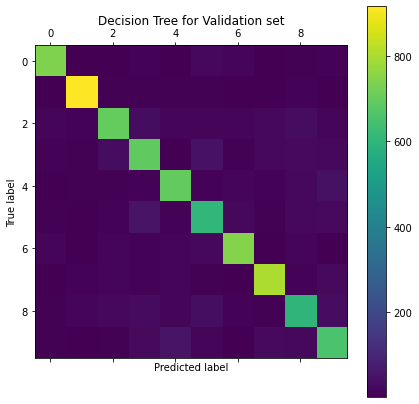

In [28]:
# plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (7,7)
plt.matshow(dt_confusionmat)
plt.title('Decision Tree for Validation set')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('svc_confmat.png')
plt.show()

### 5. Random Forest Classifier

Random Forest Classifier is an ensemble learning model.The main idea behind random forest is to prevent decision trees from overfitting. Random forest makes a decision based on votes from many decision trees which are created by using a subset of the attributes. Random Forest is suitable for both regression and classification tasks. It is also less sensitive to Outliers.

In [29]:
# training and model validation
model5 = RandomForestClassifier(n_jobs=-1,random_state=0)
model5.fit(X_train, y_train)

rf_train_score = model5.score(X_train, y_train)
rf_val_score = model5.score(X_test, y_test)

# predicting labels validation dataset
rf_y_pred = model5.predict(X_test)

# accuaracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# precision
rf_precision = precision_score(y_test, rf_y_pred, average='macro')

# recall
rf_recall = recall_score(y_test, rf_y_pred, average='macro')

# confusion matrix
rf_confusionmat = confusion_matrix(y_test, rf_y_pred)

print("\nRandomForest Classifier model score on train set: ", rf_train_score)
print("\nRandomForest Classifier model score on validation set: ", rf_val_score)
print("\nRandomForest Classifier Accuracy on validation set: ", rf_accuracy)
print("\nPrecision score: ", rf_precision)
print("\nRecall score: ", rf_recall)
print("\nConfusion Matrix: \n", rf_confusionmat)


RandomForest Classifier model score on train set:  1.0

RandomForest Classifier model score on validation set:  0.9646428571428571

RandomForest Classifier Accuracy on validation set:  0.9646428571428571

Precision score:  0.9641144996848279

Recall score:  0.9643199885593999

Confusion Matrix: 
 [[794   0   1   1   2   3   5   0   7   0]
 [  0 946   7   3   2   0   0   1   2   0]
 [  3   1 835   4   2   1   3   4   6   1]
 [  2   1  14 815   0   9   2   8   9   3]
 [  2   2   1   0 797   0   3   1   3  18]
 [  2   1   1   9   0 733   6   1   2   1]
 [  2   0   0   0   2   5 829   0   2   1]
 [  1   3  12   1   5   1   0 861   3  12]
 [  1   4   2  11   2  11   4   0 729   4]
 [ 10   1   2   8  12   2   0   9   4 764]]


In [30]:
print("Random Forest Classification Report: \n")
print(classification_report(y_test, rf_y_pred, target_names=target_names))

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.99      0.98      0.99       961
           2       0.95      0.97      0.96       860
           3       0.96      0.94      0.95       863
           4       0.97      0.96      0.97       827
           5       0.96      0.97      0.96       756
           6       0.97      0.99      0.98       841
           7       0.97      0.96      0.97       899
           8       0.95      0.95      0.95       768
           9       0.95      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



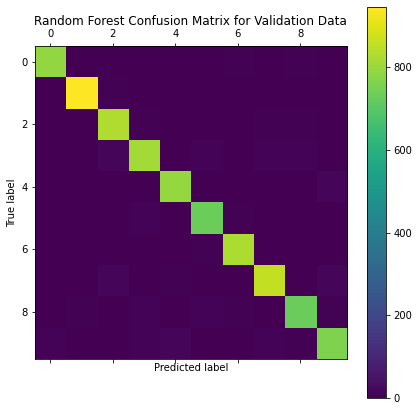

In [31]:
# plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (7,7)
plt.matshow(rf_confusionmat)
plt.title('Random Forest Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('rf_confmat2.png')
plt.show()

### 6. CNN

CNN’s are used to perform analysis on images and visuals. These classes of neural networks can input a multi-channel image and work on it easily with minimal preprocessing required. CNN can learn multiple layers of feature representations of an image by applying filters, or transformations. We have used a network with 6 convolutional layers, 3 maxpool layers and few other layers.

In [32]:
#Developing a Keras Sequential model 

#Train test split

X=np.array(train.drop('label',axis=1)).reshape(train.shape[0],*(28,28,1))
y=train.label
X_train,X_test,y_train,y_test = train_test_split(X,y)

import tensorflow as tf
#Setting seed
tf.random.set_seed(123)
model6 = keras.Sequential()
#This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
model6.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same', activation='relu', input_shape=(28,28,1)))
model6.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
#Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1
model6.add(keras.layers.BatchNormalization())
#Max pooling operation for 2D spatial data
model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.3))
model6.add(keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same', activation='relu', input_shape=(28,28,1)))
model6.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.3))
model6.add(keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same', activation='relu', input_shape=(28,28,1)))
model6.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.3))
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(2048, activation='relu'))
model6.add(keras.layers.Dropout(0.3))
model6.add(keras.layers.Dense(512, activation='relu'))
model6.add(keras.layers.Dropout(0.3))
model6.add(keras.layers.Dense(128, activation='relu'))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Dropout(0.3))
model6.add(keras.layers.Dense(10, activation='softmax'))


In [33]:
print(model6.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       7

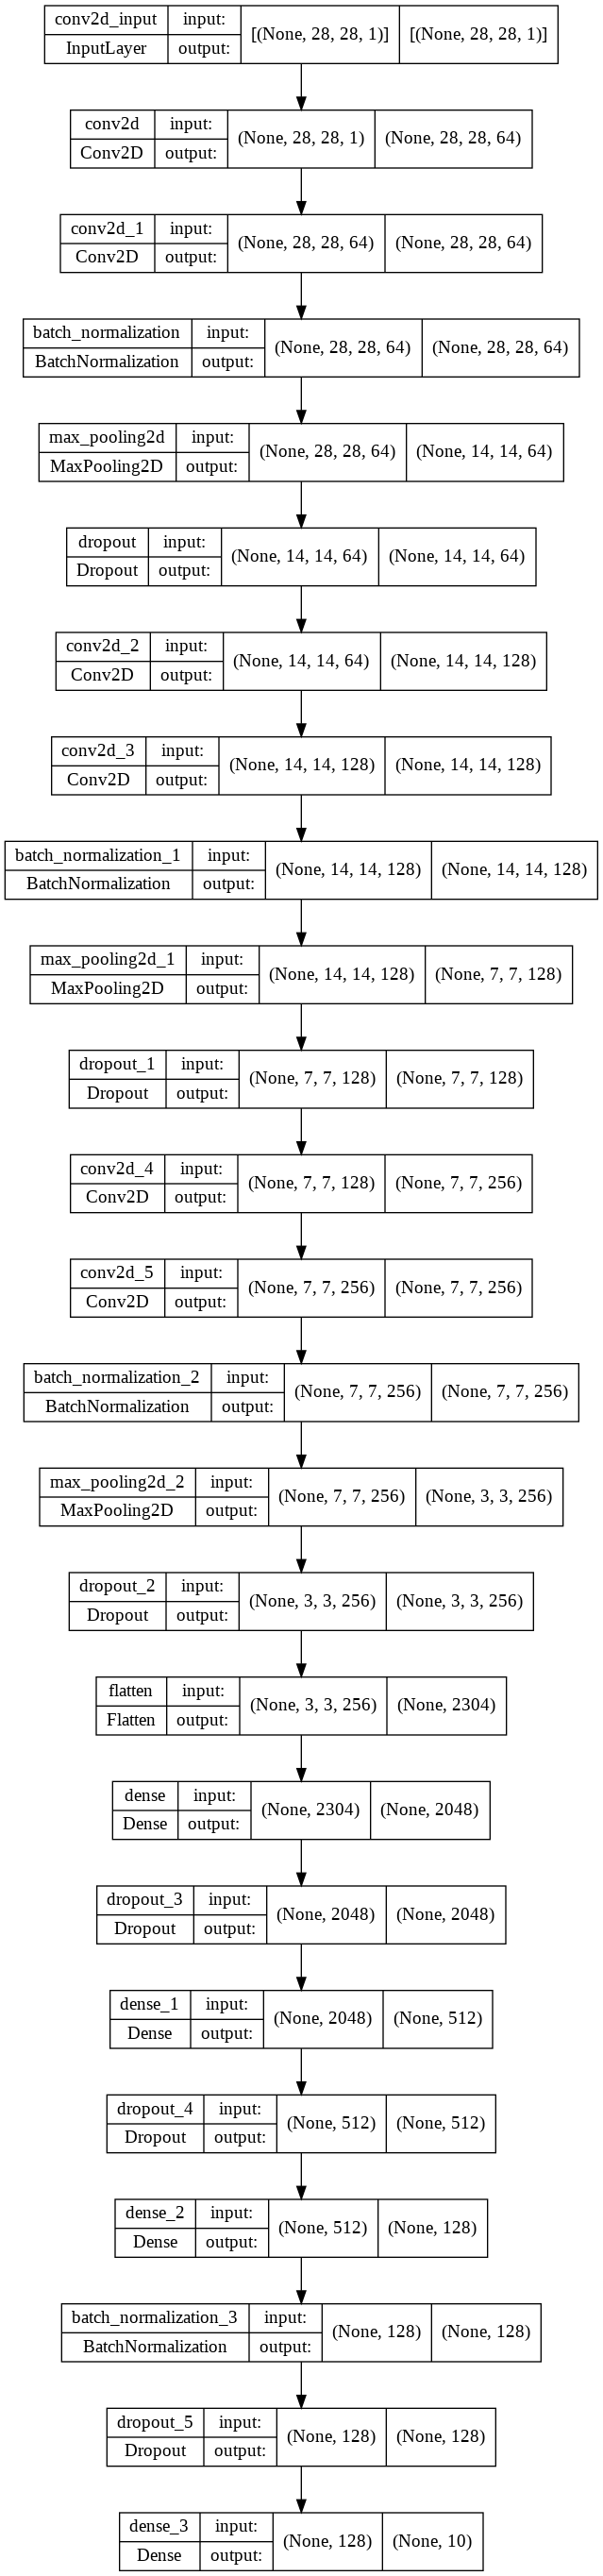

In [34]:
from tensorflow.keras.utils import plot_model
#looking at the  CNN model
plot_model(model6, show_shapes=True, show_layer_names=True)

In [35]:
model6.compile(optimizer=tf.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )
# scale the values between 0 and 1 for both training and validation sets
X_train=X_train/255
X_test=X_test/255

In [36]:
model6.fit(X_train, y_train, epochs=20)

Epoch 1/20
985/985 [==============================] - 22s 10ms/step - loss: 0.3257 - accuracy: 0.8994
Epoch 2/20
985/985 [==============================] - 10s 10ms/step - loss: 0.0935 - accuracy: 0.9732
Epoch 3/20
985/985 [==============================] - 10s 10ms/step - loss: 0.0712 - accuracy: 0.9803
Epoch 4/20
985/985 [==============================] - 10s 10ms/step - loss: 0.0572 - accuracy: 0.9838
Epoch 5/20
985/985 [==============================] - 10s 10ms/step - loss: 0.0472 - accuracy: 0.9868
Epoch 6/20
985/985 [==============================] - 10s 10ms/step - loss: 0.0484 - accuracy: 0.9865
Epoch 7/20
985/985 [==============================] - 10s 10ms/step - loss: 0.0422 - accuracy: 0.9881
Epoch 8/20
985/985 [==============================] - 10s 10ms/step - loss: 0.0331 - accuracy: 0.9906
Epoch 9/20
985/985 [==============================] - 10s 10ms/step - loss: 0.0379 - accuracy: 0.9904
Epoch 10/20
985/985 [==============================] - 10s 10ms/step - loss: 0.028

In [37]:
#Evaluating on the model
results=model6.evaluate(X_test,y_test)
cnn_accuracy = results[1]

329/329 [==============================] - 2s 4ms/step - loss: 0.0291 - accuracy: 0.9934


In [38]:
#test = pd.read_csv("/content/test.csv")
test_images = np.array(test).reshape(test.shape[0],*(28,28,1))
X_test = test_images / 255

In [39]:
#looking at the y_pred
y_pred = np.argmax(model6.predict(X_test), axis=-1)
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [40]:
#Prediction values
submission = pd.read_csv("/content/sample_submission.csv")
submission["Label"] = y_pred
submission.to_csv("/content/submit.csv", index=False)

In [41]:
#Comparing all the accuracy values
accuracies = pd.DataFrame([[lr_accuracy, sgd_accuracy, svc_accuracy, dt_accuracy, rf_accuracy, cnn_accuracy]], columns=['lr','sgd','svc', 'dt', 'rf', 'cnn_accuracy']).T
accuracies.rename(columns={0 :'accuracy'}, inplace=True)
accuracies.reset_index(inplace=True)
accuracies['accuracy'] = accuracies.accuracy*100

In [42]:
accuracies

,index,accuracy
0,lr,91.750000
1,sgd,87.107143
2,svc,97.476190
3,dt,85.297619
4,rf,96.464286
5,cnn_accuracy,99.342859


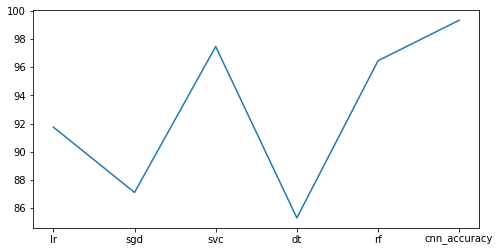

In [43]:
#Plotting accuracies of various models
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(accuracies['index'], accuracies['accuracy'])
plt.show()

Looking at all the models, CNN gives highest accuracy and it is the best model.